1. Import Library

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

2. baca dataset

In [34]:
# menghubungkan colab ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# memanggil data set lewat gdrive
path = "/content/drive/MyDrive/ML_praktikum/praktikum04"

In [36]:
# membaca file csv menggunakan pandas

df = pd.read_csv(path + '/data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [37]:
print("=== 5 Data Pertama ===")
display(df.head())

=== 5 Data Pertama ===


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


3. pisahkan fitur dan target

In [39]:
X = df.drop(columns=['ID', 'Beli_Mobil'])
y = df['Beli_Mobil']

3. scaling

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Split data training dan testing

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nJumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah data training: 800
Jumlah data testing: 200


5. Bangun model Logistic Regression

In [42]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

6. evaluasi model

In [43]:
y_pred = model.predict(X_test)
print("\n=== Evaluasi Model ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Evaluasi Model ===
Akurasi: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.96      0.93      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



7. confussion matrix

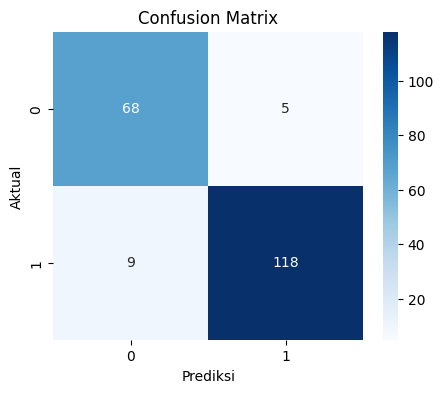

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

8. prediksi data baru

In [45]:
data_baru = pd.DataFrame({
    'Usia': [30, 45],
    'Status': [1, 2],
    'Kelamin': [1, 2],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [240, 130]  # sesuaikan skala dengan dataset asli
})

# pastikan urutan kolom sama
data_baru = data_baru[X.columns]

# scaling dan prediksi
data_baru_scaled = scaler.transform(data_baru)
prediksi_baru = model.predict(data_baru_scaled)

print("\n=== Prediksi Calon Pembeli Baru ===")
for i, pred in enumerate(prediksi_baru):
    hasil = "Akan Membeli Mobil" if pred == 1 else "Tidak Membeli Mobil"
    print(f"Calon Pembeli ke-{i+1}: {hasil}")


=== Prediksi Calon Pembeli Baru ===
Calon Pembeli ke-1: Akan Membeli Mobil
Calon Pembeli ke-2: Tidak Membeli Mobil


9. ROC Curve

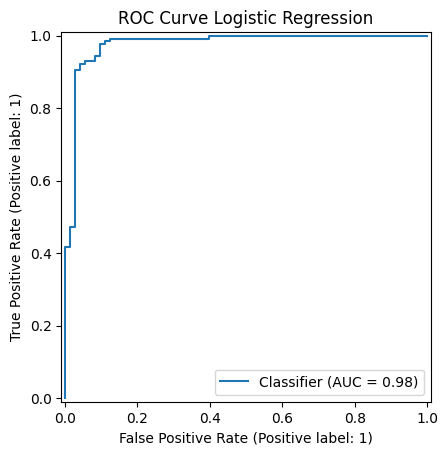

In [46]:
from sklearn.metrics import RocCurveDisplay

y_proba = model.predict_proba(X_test)[:,1]
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve Logistic Regression")
plt.show()

10. intrepretasi **koefisien**

In [47]:
coefficients = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_[0],
    'Odds_Ratio': np.exp(model.coef_[0])
})
print("\n=== Interpretasi Model ===")
display(coefficients)


=== Interpretasi Model ===


,Fitur,Koefisien,Odds_Ratio
0,Usia,-0.078626,0.924386
1,Status,-0.150425,0.860342
2,Kelamin,-0.596917,0.550506
3,Memiliki_Mobil,0.103336,1.108864
4,Penghasilan,4.778435,118.918063
